# Import modules

In [1]:
import pandas as pd
import re
import requests
from sklearn.model_selection import train_test_split

In [2]:
SEED=1

# Load data

In [3]:
def load_boston_housing():
  from sklearn.datasets import load_boston
  tmp = load_boston(return_X_y=False)
  return (pd.DataFrame(tmp['data'], columns=tmp['feature_names'])
  .assign(target=tmp['target'])
  )


In [4]:
df = load_boston_housing()

In [5]:
vars={
'CRIM':     'per capita crime rate by town',
'ZN':       'proportion of residential land zoned for lots over 25,000 sq.ft.',
'INDUS':    'proportion of non-retail business acres per town',
'CHAS':     'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
'NOX':      'nitric oxides concentration (parts per 10 million)',
'RM':       'average number of rooms per dwelling',
'AGE':      'proportion of owner-occupied units built prior to 1940',
'DIS':      'weighted distances to five Boston employment centres',
'RAD':      'index of accessibility to radial highways',
'TAX':      'full-value property-tax rate per $10,000',
'PTRATIO':  'pupil-teacher ratio by town',
'B':        '1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
'LSTAT':    '% lower status of the population',
'MEDV':     'Median value of owner-occupied homes in $1000s',
}

# 1 - Descrição do conjunto de dados

In [6]:
df.shape

(506, 14)

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [10]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

# 2- Separação do conjunto em treino e teste

In [11]:
tmp_set, test_set = train_test_split(df, 
                                       test_size=0.2, #20% para teste
                                       random_state=SEED)


train_set, val_set = train_test_split(tmp_set, 
                                       test_size=0.2, #20% do  train set para validação
                                       random_state=SEED)


# 3 - Visualização do conjunto de dados (análise exploratória básica)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fddbbd53438>,
      dtype=object)

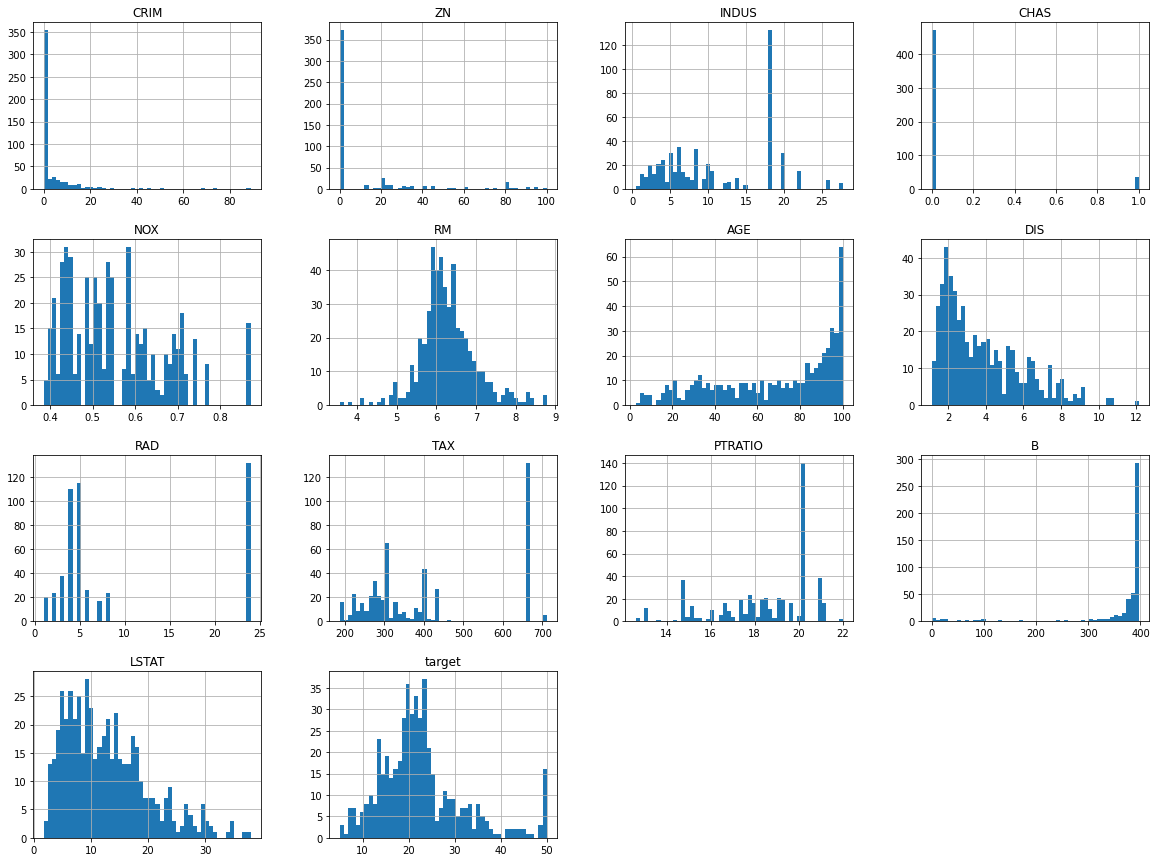

In [12]:
df.hist(bins=50, figsize=(20,15))

# 4 - Preparação do conjunto de dados

In [13]:
x_train=train_set.drop(columns='target')
y_train=train_set['target']

In [14]:
x_val=val_set.drop(columns='target')
y_val=val_set['target']

In [15]:
x_test=test_set.drop(columns='target')
y_test=test_set['target']

# 5  -  Comparar ao menos 3 modelos de machine learning e algumas configuração de hiperparâmetros, justificando a escola do melhor modelo

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor



LinReg_param_grid={'normalize': [True, False]}



DecTreeReg_param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }


XGBReg_param_grid = {'min_child_weight':[4,5],
                     'gamma':[i/10.0 for i in range(3,6)],
                     'subsample':[i/10.0 for i in range(6,11)],
                     'colsample_bytree':[i/10.0 for i in range(6,11)],
                     'max_depth': [2,3,4],
                     }

In [17]:
linreg_grid=GridSearchCV(LinearRegression(),
                    LinReg_param_grid)

linreg_grid.fit(x_train, y_train)

linreg=linreg_grid.best_estimator_

In [18]:
dectreereg_grid=GridSearchCV(DecisionTreeRegressor(),
                             DecTreeReg_param_grid)

dectreereg_grid.fit(x_train, y_train)

dectreereg=dectreereg_grid.best_estimator_

In [19]:
xgbreg_grid=GridSearchCV(XGBRegressor(objective='reg:squarederror'),
                         XGBReg_param_grid)

xgbreg_grid.fit(x_train, y_train)


xgbreg=xgbreg_grid.best_estimator_

In [20]:
linreg.predict(x_val)

array([ 5.18264452, 20.33880247, 18.35814591, 22.58948892, 33.59284084,
       38.46845337, 25.76523514, 21.34070836, 23.95755925, 25.09925083,
       31.12038081, 21.70838997, 18.89200304, 17.69358469,  9.98969068,
       21.25798649, 11.7426925 , 33.99363529, 18.04566193,  4.27770104,
       18.6462156 , 23.68203323,  4.49666547, 28.22854766, 38.3736165 ,
       24.62741092, 23.66910859, 24.44820414, 15.03373204, 32.92986358,
        7.24490091, 17.20647185, 15.18539529, 17.31596018, 24.48005579,
       22.69783251, 27.73161114, 27.13708715, 16.40566397, 12.96390216,
       33.59100866, 22.5445906 , 24.11641964, 27.45256579, 14.99358159,
       24.00043227, 24.98251616, 13.37888235, 20.96145064, 26.9973449 ,
       36.24495255, 19.05521055, 26.38297275, 27.55723576, 21.50368113,
       20.41769862, 21.68366934, 29.37482792, 23.7287064 , 16.10934131,
       24.83403847, 28.19958923, 24.48875109, 16.55566649, 18.59215388,
       22.58690233, 19.50003225, 22.54461992, 22.62516428, 20.00

In [21]:
mean_squared_error(y_val, linreg.predict(x_val))

21.476168024931674

In [22]:
mean_squared_error(y_val, dectreereg_grid.predict(x_val))

27.508978122201512

In [23]:
mean_squared_error(y_val, xgbreg.predict(x_val))

10.41920073799654

# 6 - Fazer teste final para obter um erro aproximado

In [24]:
mean_squared_error(y_test, xgbreg.predict(x_test))

10.81148693892986